<br><h1> <img src="https://serea2017.uniandes.edu.co/images/Logo.png" height="120" width="400" align="Center" /><br>

# MIIIA Advanced Models: Project 1 - 22 Jun 2020

                     Names                 User        Code
           - Camilo Andrés Suárez       ca.suarezt     200321493       
           - Jhon Alexander Hernández   ja.hernandezp  200920588
           - Fernando Pérez Moreno      f-perez        200222809
           - Elquin Huertas Ramírez     e.huertas      201920061

##  1. Choosing your time series

##  2. Analysis of the context of the problem and relevance of the analysis: This should answer the question of why it is interesting or important to study the selected data.

Se realiza proyección de ventas para una de las tiendas de una de las principales cadenas de supermercados del país, con más de 600 tiendas y más de 3 billones de ventas anuales.

La predicción de valores de ventas futuras de las tiendas es de vital importancia porque permite establecer con los datos que se observan hasta el momento, si se van a lograr las diferentes metas propuestas para el periodo de tiempo proyectado. Esto permite al negocio reaccionar y tomar acciones correctivas en caso de ser necesario y lograr la consecución de las metas propuestas desde casa matriz, sin contar que se podrán afinar mejor otros aspectos como: el número de empleados por tienda, política de inventarios, logística o toma de decisiones sobre el cierre de tiendas. 

Otro uso importante que se le dará a las proyecciones de ventas por tienda basadas en series de tiempo tiene que ver con la medición de actividades de mercadeo. Su principal fin será el de establecer si las actividades de mercadeo están generando un diferencial de ventas frente a lo que sería la proyección de ventas sin actividad de marketing. Esto permitirá optimizar el uso del presupuesto a futuro en la medida que se estudien las diferentes actividades realizadas y se tenga un aprendizaje de que actividades son verdaderamente exitosas y cuáles no generan un crecimiento adecuado de las ventas y por consiguiente serían una mala inversión del presupuesto.


## 3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

#Lectura de la base de datos
df = pd.read_excel (r'C:\Users\stuka\Universidad de los Andes\Metodos Avanzados - General\Datos_Proy_FBP.xlsx', index = False)
df.replace(0, np.nan, inplace=True)
df.head()

,Date,0001,0002,0003,0004,0005,0006,0007,0008,0009,...,0584,0585,0586,0587,0588,0599,0600,0601,0606,0620
0,2018-12-01,25836517.0,17290781.0,31154959.0,50590224.0,29049529.0,22510318.0,17348555.0,27659157.0,53707914.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-02,23071679.0,17907352.0,38165903.0,47251780.0,35925309.0,22324074.0,14937201.0,35991821.0,54623670.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-03,19738447.0,13471090.0,22320937.0,35604184.0,23204887.0,17834410.0,14517653.0,23611648.0,39180618.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-04,15067107.0,13232490.0,19875703.0,26103033.0,16527524.0,14825911.0,9699245.0,16893053.0,19445711.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-05,12411244.0,10906815.0,14709023.0,24199608.0,18454813.0,13230261.0,9236547.0,13696839.0,26037410.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Se eliminan fechas que ninguna tienda abre
df=df.drop([24])
df=df.drop([31])
df=df.drop([389])
#Se eliminan tiendas con missing values
df=df.dropna(axis='columns')

df.head(10)

,Date,0001,0002,0003,0004,0005,0006,0007,0008,0009,...,0514,0515,0516,0517,0519,0520,0521,0523,0526,0527
0,2018-12-01,25836517.0,17290781.0,31154959.0,50590224.0,29049529.0,22510318.0,17348555.0,27659157.0,53707914.0,...,11904714.0,5985366.0,7052841.0,10827012.0,9070125.0,10017912.0,15652996.0,8472114.0,5958874.0,6436390.0
1,2018-12-02,23071679.0,17907352.0,38165903.0,47251780.0,35925309.0,22324074.0,14937201.0,35991821.0,54623670.0,...,15318027.0,7859916.0,8248168.0,11536273.0,9541963.0,11256059.0,15365670.0,9976081.0,5557888.0,4663894.0
2,2018-12-03,19738447.0,13471090.0,22320937.0,35604184.0,23204887.0,17834410.0,14517653.0,23611648.0,39180618.0,...,10905939.0,5399614.0,6156262.0,8258973.0,8666926.0,8003034.0,10113428.0,7146146.0,4680628.0,5246464.0
3,2018-12-04,15067107.0,13232490.0,19875703.0,26103033.0,16527524.0,14825911.0,9699245.0,16893053.0,19445711.0,...,8471472.0,4225526.0,4905197.0,9701228.0,8935640.0,6098992.0,8809016.0,4732982.0,3837115.0,4726184.0
4,2018-12-05,12411244.0,10906815.0,14709023.0,24199608.0,18454813.0,13230261.0,9236547.0,13696839.0,26037410.0,...,6598969.0,3939608.0,5777179.0,7490956.0,7117277.0,6189739.0,7340272.0,6474938.0,3233052.0,4720632.0
5,2018-12-06,15648622.0,10706240.0,16999098.0,24079417.0,15675569.0,16709988.0,11852203.0,20176051.0,30738113.0,...,8763916.0,4775241.0,6430626.0,7000200.0,8992952.0,5958889.0,8317610.0,10376292.0,3104988.0,5005365.0
6,2018-12-07,16370473.0,14195526.0,17307413.0,25603543.0,15875864.0,12532622.0,10922760.0,17235555.0,27514388.0,...,9773438.0,4680675.0,5199900.0,8697056.0,9470434.0,6791078.0,6310017.0,6845448.0,4786421.0,5957528.0
7,2018-12-08,16523846.0,13192635.0,24122635.0,36146067.0,22748273.0,17029527.0,12328071.0,26732377.0,39763781.0,...,11300125.0,6943569.0,5894994.0,8375578.0,8903307.0,9140605.0,8582336.0,9566765.0,4502454.0,4174805.0
8,2018-12-09,14055391.0,11727826.0,24003996.0,28227650.0,20583400.0,15448740.0,9867032.0,23689444.0,31318274.0,...,11088619.0,7192742.0,7065318.0,8932505.0,8244827.0,7780762.0,8965895.0,8037304.0,5054908.0,3494627.0
9,2018-12-10,15173013.0,13187721.0,15712189.0,25028777.0,14673324.0,11940499.0,9929515.0,17215813.0,23830117.0,...,6702719.0,3282503.0,4505717.0,6335580.0,7167866.0,5836099.0,6497031.0,6596610.0,3957802.0,4118853.0


In [3]:
#Se normalizan las series de datos
for x in range(len(df.columns)-1):
    df.iloc[:,x+1] = np.log10(df.iloc[:,x+1])
df.head(10)

,Date,0001,0002,0003,0004,0005,0006,0007,0008,0009,...,0514,0515,0516,0517,0519,0520,0521,0523,0526,0527
0,2018-12-01,7.412234,7.237815,7.493527,7.704067,7.463139,7.352382,7.239263,7.441839,7.730038,...,7.075719,6.777091,6.848364,7.034509,6.957613,7.000777,7.194597,6.927992,6.775164,6.808642
1,2018-12-02,7.363079,7.253031,7.581676,7.674418,7.555401,7.348773,7.174269,7.556204,7.737381,...,7.185203,6.895418,6.916357,7.062066,6.979638,7.051386,7.186552,6.998960,6.744910,6.668749
2,2018-12-03,7.295313,7.129403,7.348712,7.551501,7.365579,7.251259,7.161896,7.373126,7.593071,...,7.037663,6.732363,6.789317,6.916926,6.937865,6.903255,7.004898,6.854072,6.670304,6.719867
3,2018-12-04,7.178030,7.121642,7.298322,7.416691,7.218208,7.171021,6.986738,7.227708,7.288824,...,6.927959,6.625881,6.690656,6.986827,6.951126,6.785258,6.944927,6.675135,6.584005,6.674511
4,2018-12-05,7.093815,7.037698,7.167584,7.383808,7.266110,7.121568,6.965510,7.136620,7.415598,...,6.819476,6.595453,6.761716,6.874537,6.852314,6.791672,6.865712,6.811236,6.509613,6.674000
5,2018-12-06,7.194476,7.029637,7.230426,7.381646,7.195223,7.222976,7.073799,7.304836,7.487677,...,6.942698,6.678995,6.808253,6.845110,6.953902,6.775165,6.919999,7.016042,6.492060,6.699436
6,2018-12-07,7.214061,7.152151,7.238232,7.408300,7.200737,7.098042,7.038332,7.236425,7.439560,...,6.990047,6.670308,6.715995,6.939372,6.976370,6.831939,6.800031,6.835402,6.680011,6.775066
7,2018-12-08,7.218111,7.120332,7.382425,7.558061,7.356948,7.231203,7.090895,7.427038,7.599488,...,7.053083,6.841583,6.770483,6.923015,6.949551,6.960975,6.933606,6.980765,6.653449,6.620636
8,2018-12-09,7.147843,7.069218,7.380284,7.450675,7.313517,7.188893,6.994187,7.374555,7.495798,...,7.044877,6.856894,6.849132,6.950973,6.916182,6.891022,6.952594,6.905110,6.703713,6.543401
9,2018-12-10,7.181072,7.120170,7.196237,7.398440,7.166529,7.077022,6.996928,7.235928,7.377126,...,6.826251,6.516205,6.653764,6.801786,6.855390,6.766123,6.812715,6.819321,6.597454,6.614776


In [4]:
#Se renombra columna de fecha a ds para FB prophet
df.rename(columns={'Date':'ds'}, inplace=True)
df.head(10)

,ds,0001,0002,0003,0004,0005,0006,0007,0008,0009,...,0514,0515,0516,0517,0519,0520,0521,0523,0526,0527
0,2018-12-01,7.412234,7.237815,7.493527,7.704067,7.463139,7.352382,7.239263,7.441839,7.730038,...,7.075719,6.777091,6.848364,7.034509,6.957613,7.000777,7.194597,6.927992,6.775164,6.808642
1,2018-12-02,7.363079,7.253031,7.581676,7.674418,7.555401,7.348773,7.174269,7.556204,7.737381,...,7.185203,6.895418,6.916357,7.062066,6.979638,7.051386,7.186552,6.998960,6.744910,6.668749
2,2018-12-03,7.295313,7.129403,7.348712,7.551501,7.365579,7.251259,7.161896,7.373126,7.593071,...,7.037663,6.732363,6.789317,6.916926,6.937865,6.903255,7.004898,6.854072,6.670304,6.719867
3,2018-12-04,7.178030,7.121642,7.298322,7.416691,7.218208,7.171021,6.986738,7.227708,7.288824,...,6.927959,6.625881,6.690656,6.986827,6.951126,6.785258,6.944927,6.675135,6.584005,6.674511
4,2018-12-05,7.093815,7.037698,7.167584,7.383808,7.266110,7.121568,6.965510,7.136620,7.415598,...,6.819476,6.595453,6.761716,6.874537,6.852314,6.791672,6.865712,6.811236,6.509613,6.674000
5,2018-12-06,7.194476,7.029637,7.230426,7.381646,7.195223,7.222976,7.073799,7.304836,7.487677,...,6.942698,6.678995,6.808253,6.845110,6.953902,6.775165,6.919999,7.016042,6.492060,6.699436
6,2018-12-07,7.214061,7.152151,7.238232,7.408300,7.200737,7.098042,7.038332,7.236425,7.439560,...,6.990047,6.670308,6.715995,6.939372,6.976370,6.831939,6.800031,6.835402,6.680011,6.775066
7,2018-12-08,7.218111,7.120332,7.382425,7.558061,7.356948,7.231203,7.090895,7.427038,7.599488,...,7.053083,6.841583,6.770483,6.923015,6.949551,6.960975,6.933606,6.980765,6.653449,6.620636
8,2018-12-09,7.147843,7.069218,7.380284,7.450675,7.313517,7.188893,6.994187,7.374555,7.495798,...,7.044877,6.856894,6.849132,6.950973,6.916182,6.891022,6.952594,6.905110,6.703713,6.543401
9,2018-12-10,7.181072,7.120170,7.196237,7.398440,7.166529,7.077022,6.996928,7.235928,7.377126,...,6.826251,6.516205,6.653764,6.801786,6.855390,6.766123,6.812715,6.819321,6.597454,6.614776


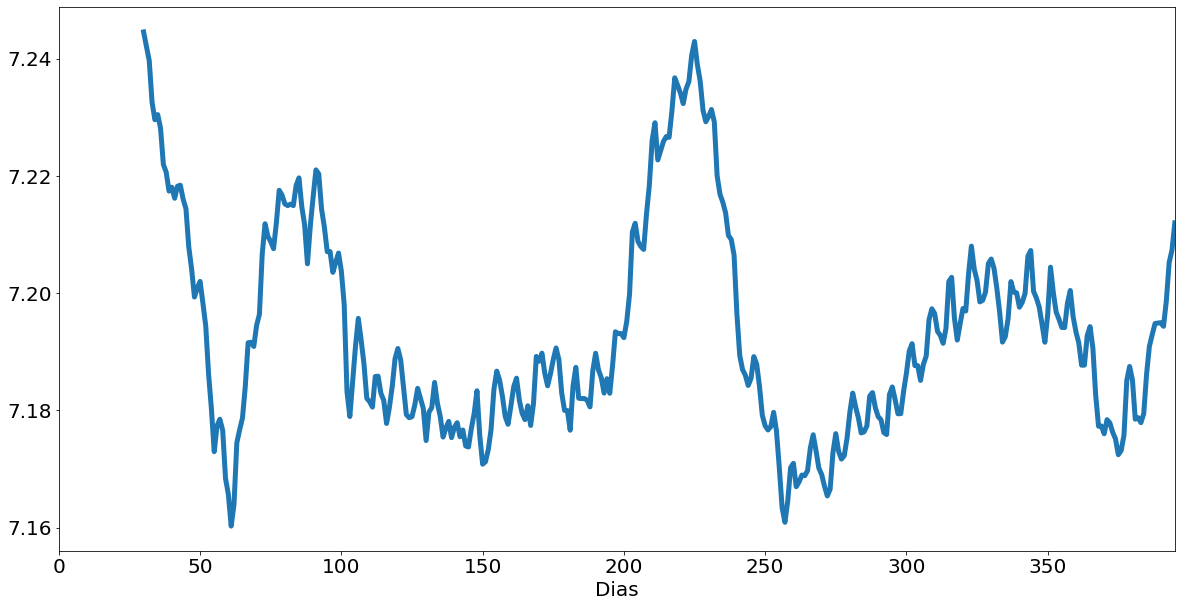

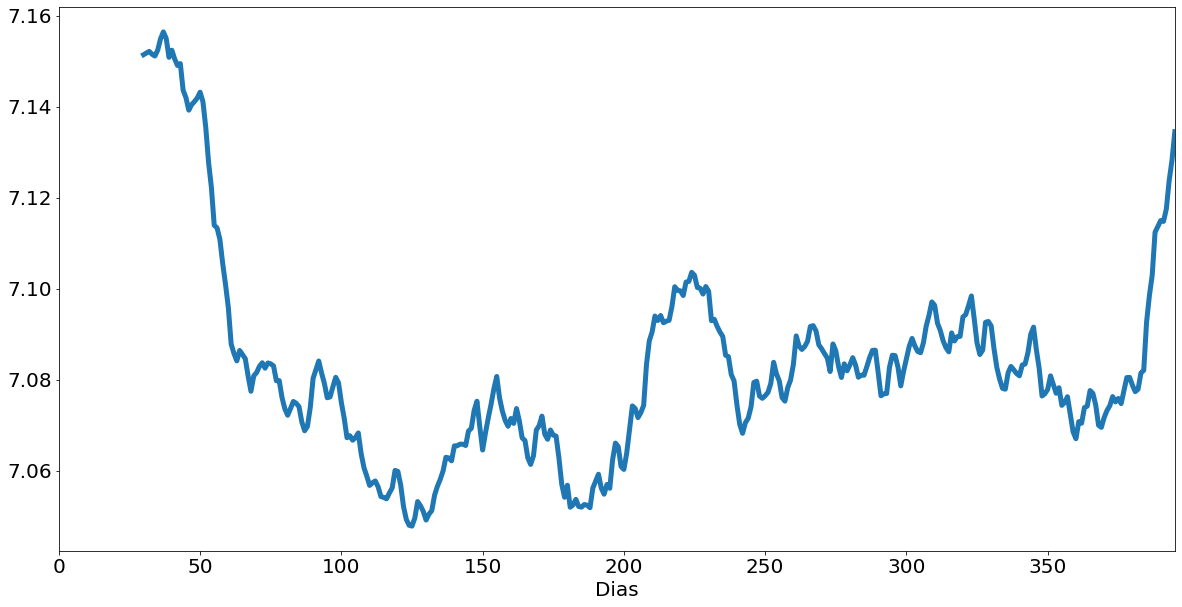

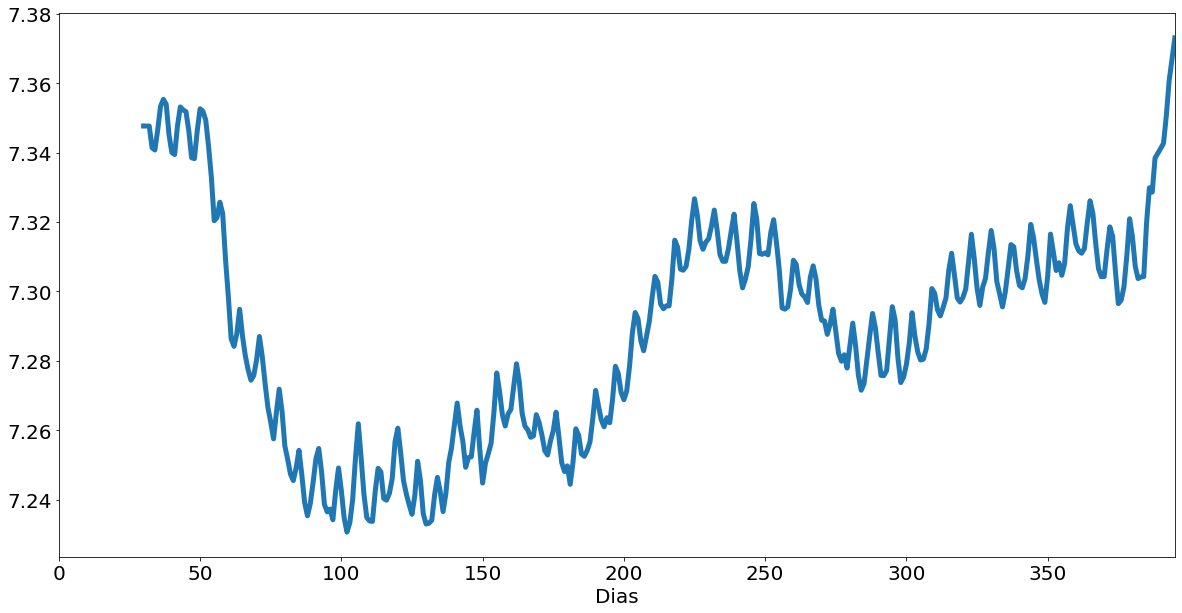

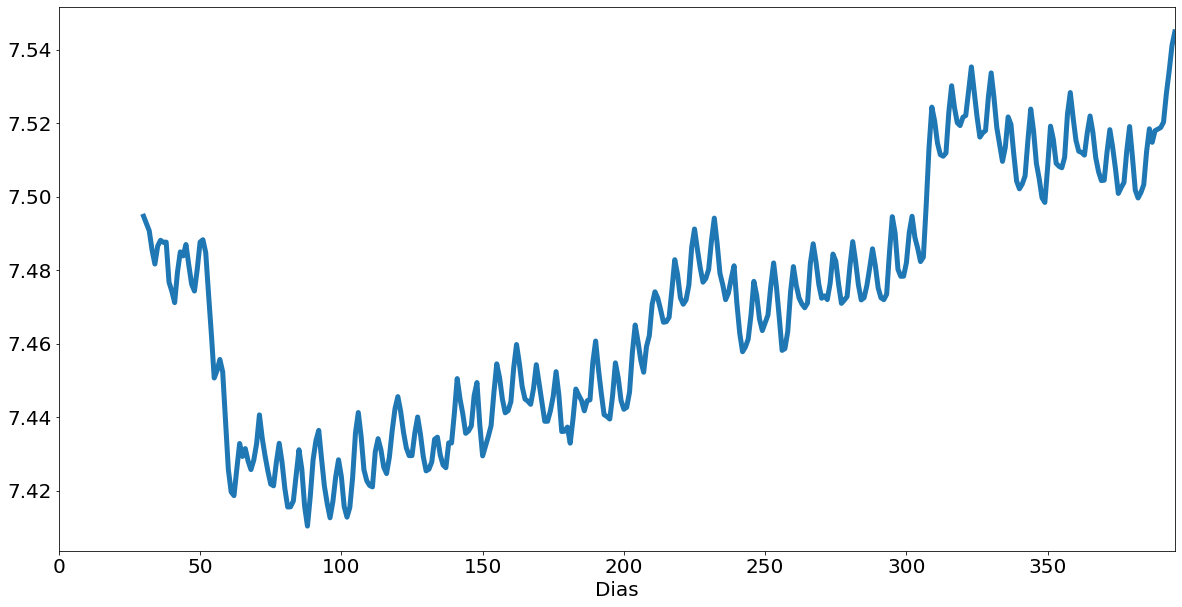

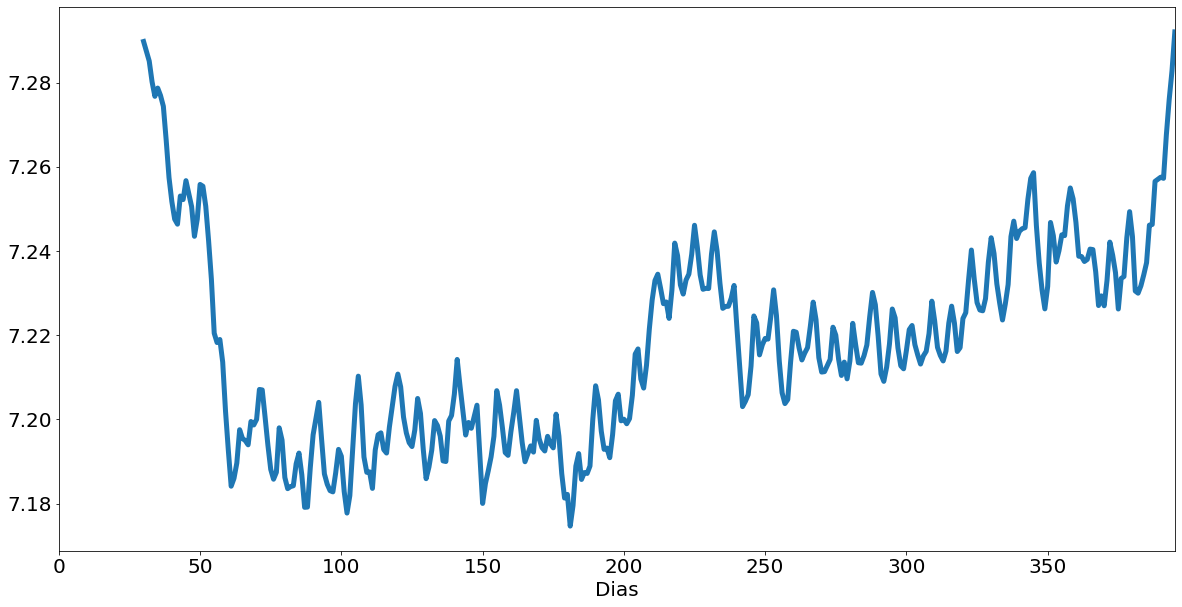

In [6]:
#Tendencia de la serie tiendas de la base de datos 
#codigo para todas las tiendas
#for x in range(len(df.columns)-1): 

#Codigo para 5 tiendas, se recorta el for por tema de tamano del notebook en github
for x in range(len(df.columns)-474): 
    items = df.iloc[:,(x+1)]
    items.rolling(30).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
    plt.xlabel('Dias', fontsize=20)
    plt.show()

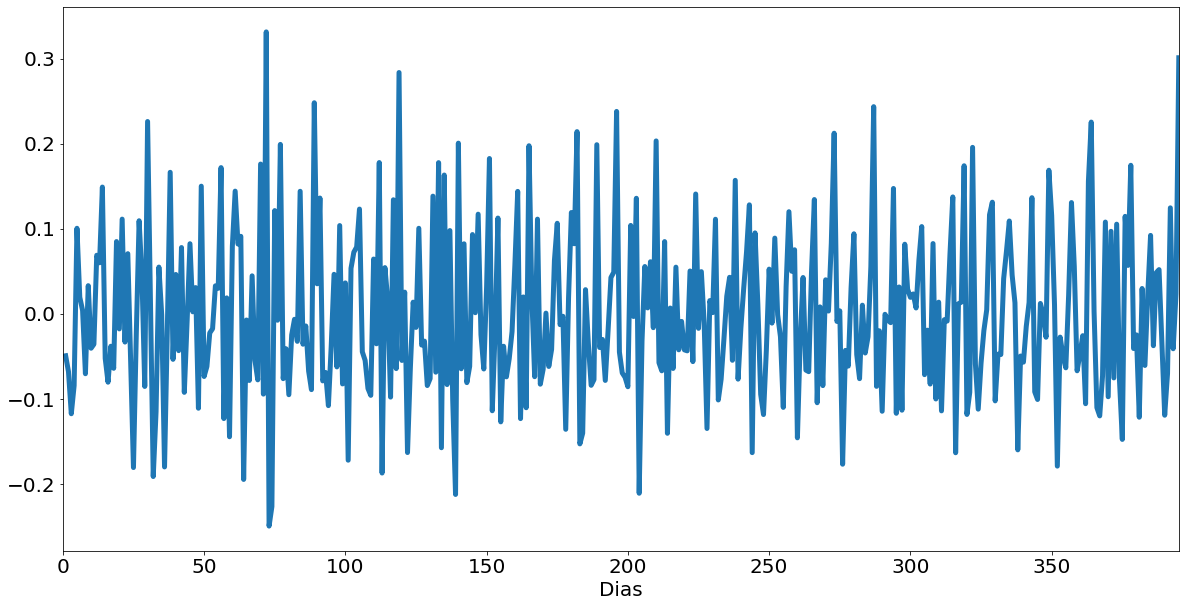

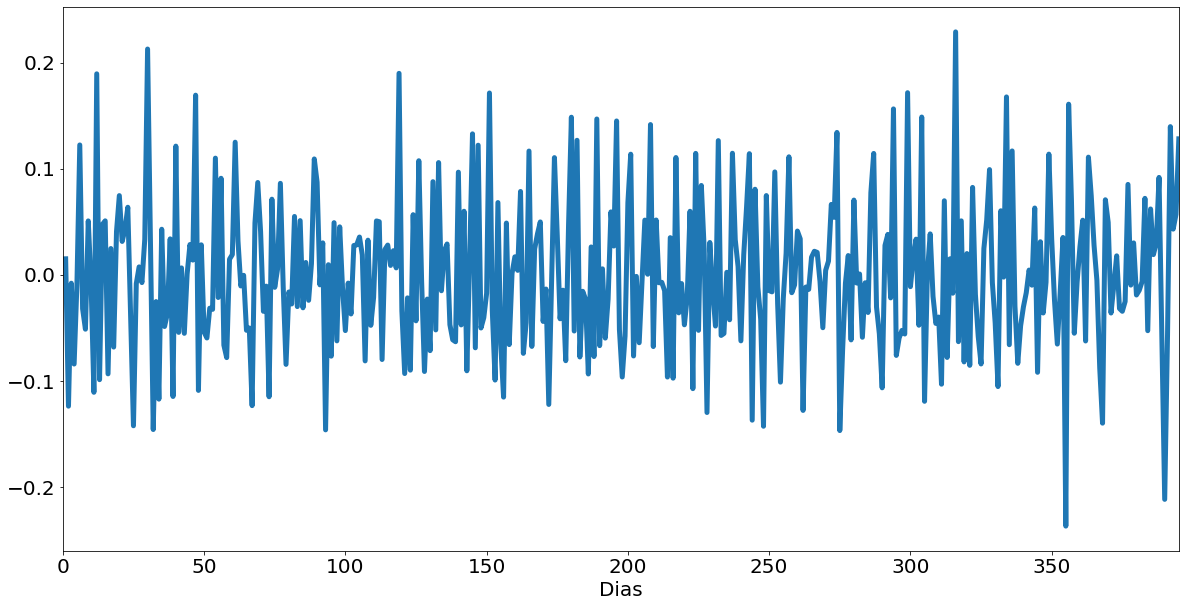

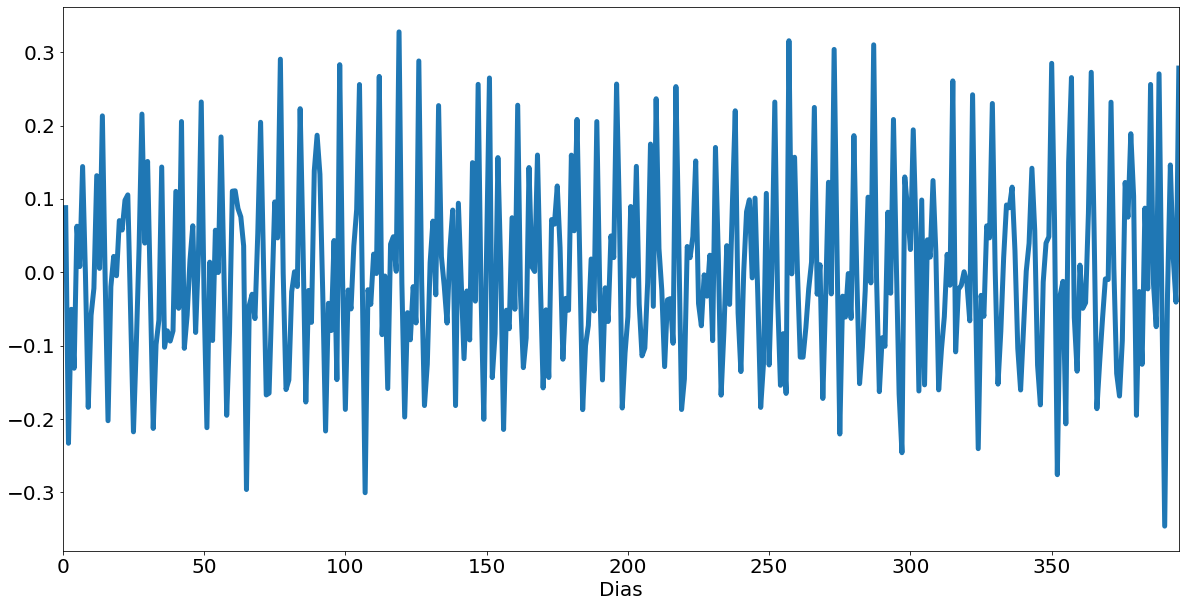

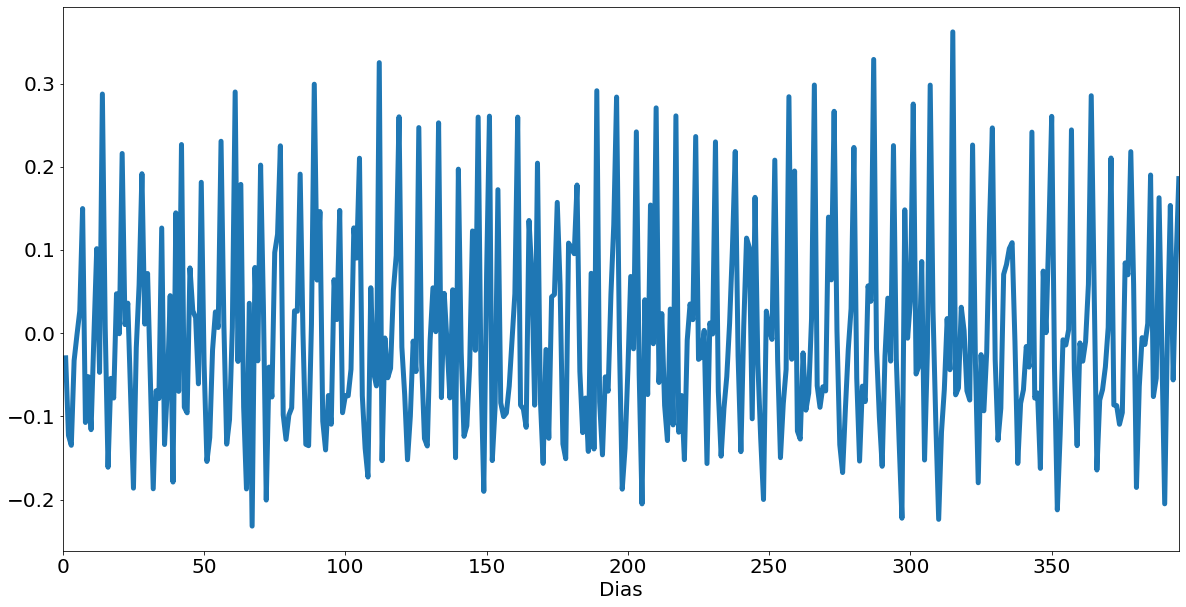

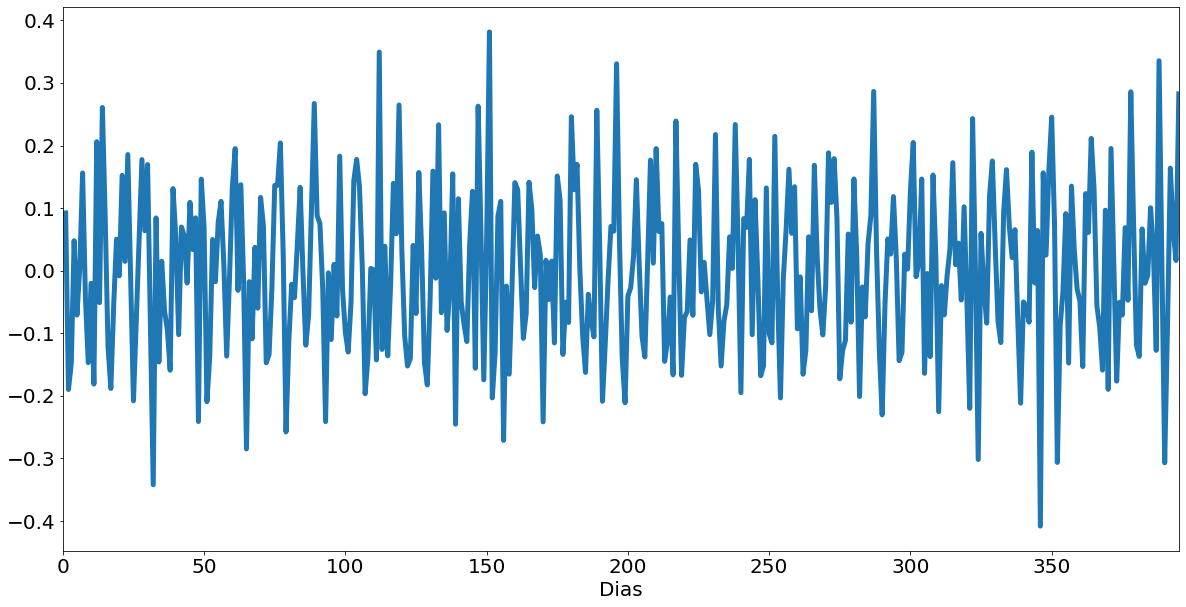

In [7]:
#Seasonality de las tiendas
#codigo para todas las tiendas
#for x in range(len(df.columns)-1): 

#Codigo para 5 tiendas, se recorta el for por tema de tamano del notebook en github
for x in range(len(df.columns)-474):
    items = df.iloc[:,(x+1)]
    items.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
    plt.xlabel('Dias', fontsize=20)
    plt.show()

In [133]:
from statsmodels.tsa.stattools import adfuller
def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

## Para simplificar el analisis teniendo en cuenta las observaciones al momento de presentar la base inicial se realizará análisis de la tienda '0001' de la cadena. 

In [134]:
#Prueba Dickey-Fuller
evaluate = ['0001']
for x in evaluate:
    result = adfuller(df[x])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
#Se rechaza hipotesis nula con un nivel de significancia del 5%, hay suficiente evidencia estadistica
#para inferir que la serie es estacionaria

ADF Statistic: -4.444624
p-value: 0.000247
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


## Se rechaza hipotesis nula con un nivel de significancia del 5%, hay suficiente evidencia estadistica para inferir que la serie es estacionaria

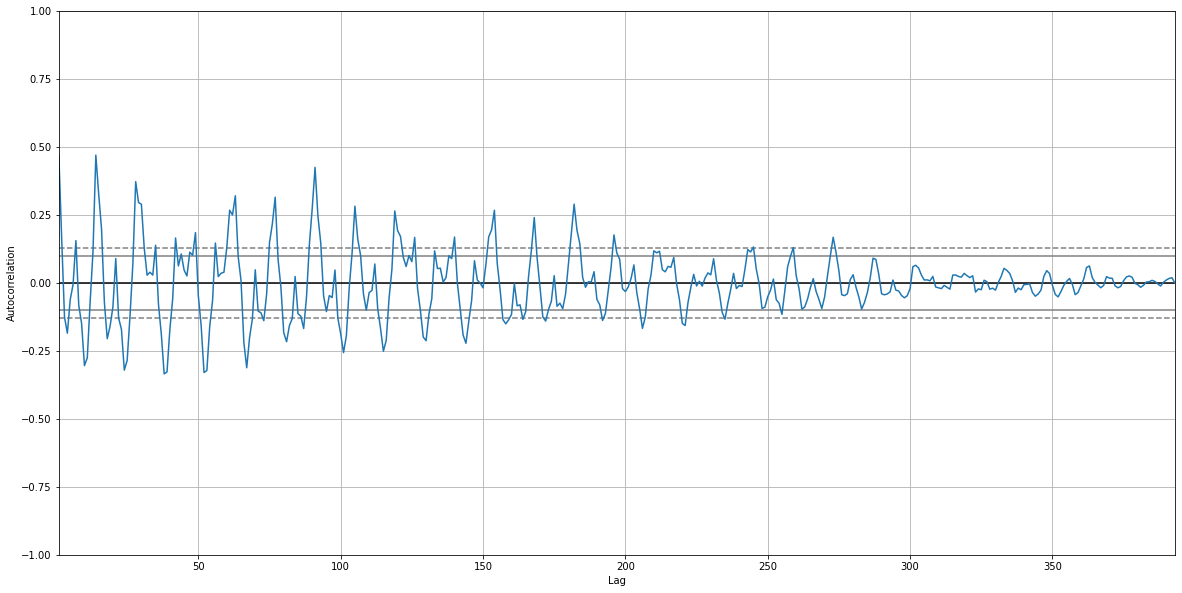

In [135]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df[['0001']]);

## Entre los periodos 0 - 230 se observan autocorrelaciones significativas en los datos, las observaciones posteriores al dia 230 se convierten en ruido blanco. 

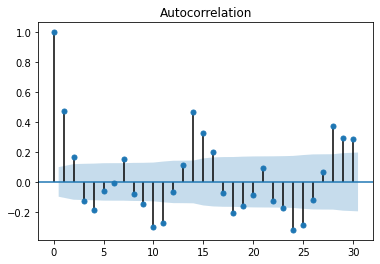

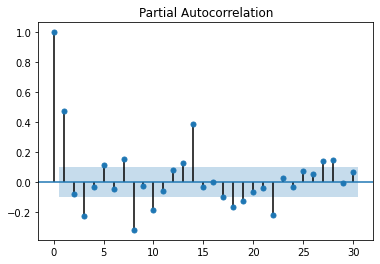

In [136]:
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
dates = 30
plot_acf(df['0001'], lags=dates);
plot_pacf(df['0001'], lags=dates);

## AR 15 - el gráfico de autocorrelación muestra una tendencia decreciente y el gráfico de autocorrelación parcial evidencia que el rezago 15 es significativo para este proceso.

## 4. Application of the model in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

### Modelado de la serie original

In [137]:
#Se lee base de datos
from fbprophet import Prophet
m = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)
df1 = df.iloc[:,:2].copy()
df1.rename(columns={'0001':'y'}, inplace=True)
df1
m.fit(df1)

In [138]:
#Se realiza proyeccion de 30 dias
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
418,2020-01-26
419,2020-01-27
420,2020-01-28
421,2020-01-29
422,2020-01-30


In [139]:
#Se realiza forecast mediante paquete prophet, se imprime fechas, predicción, máximos y mínimos de proyección
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
418,2020-01-26,7.196423,7.093019,7.301322
419,2020-01-27,7.190897,7.092273,7.295501
420,2020-01-28,7.145810,7.042896,7.243570
421,2020-01-29,7.124665,7.028898,7.226420
422,2020-01-30,7.155939,7.057820,7.265448


### Plotting the Forecast

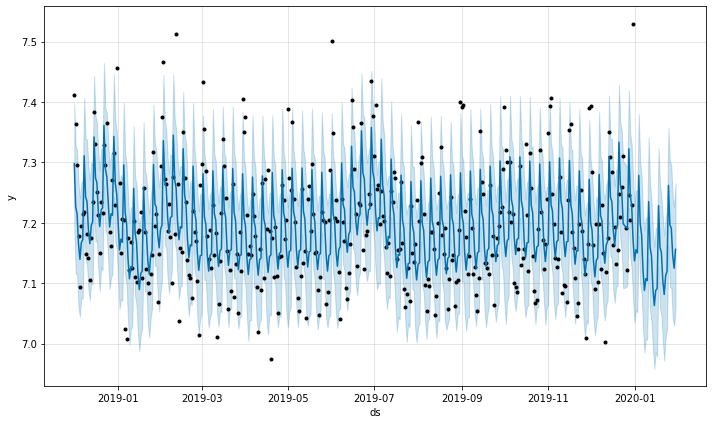

In [140]:
#Plot de predicciones, prediccion del mes de enero. Se observa una tendencia negativa, algo normal para 
#este mes del año luego de las ventas del mes de diciembre.
fig1 = m.plot(forecast)

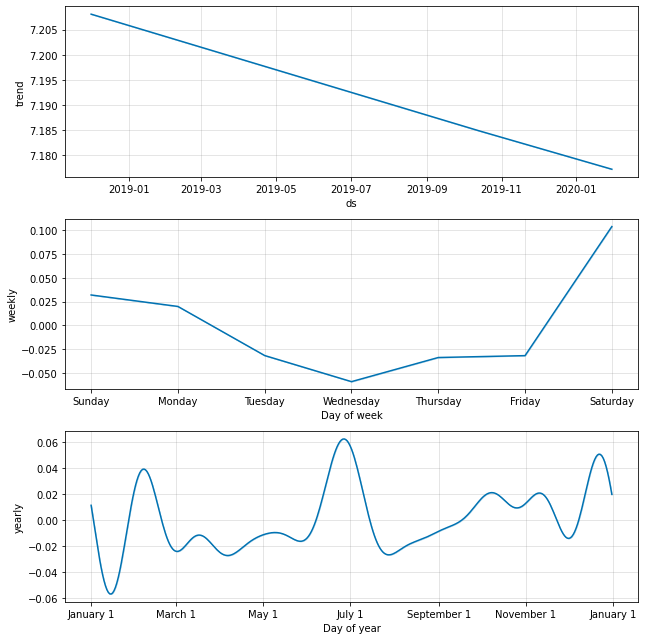

In [143]:
m.plot_components(forecast);

## Esta tienda fue la primera que abrió en el país; por lo tanto, es una tienda madura que tiene una tendencia negativa en sus ventas debido a la apertura de nuevas tiendas alreedor de esta.

## en cuanto a estacionalidad semanal, se observa que los fines de semana, junto con los días lunes, son los de mayor volumen de ventas, mientras que los martes, miércoles y jueves, están por debajo del promedio de ventas.

## Por último, en cuanto a la estacionalidad anual, los picos de venta de la tienda se presentan en los meses de febrero, junio, julio (prima) y diciembre. Otros meses con ventas por encima del promedio se encuentran en el periodo de octubre hasta mediados de noviembre.

In [144]:
m = Prophet()
m.fit(df1)
forecast = m.predict()
df = pd.merge(df1, forecast, on='ds')
residuals = df['yhat'] - df['y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


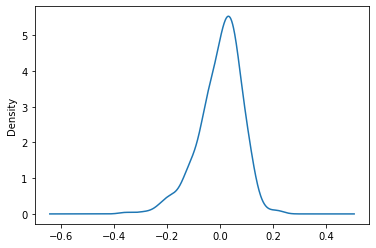

count    393.000000
mean      -0.000010
std        0.081243
min       -0.356266
25%       -0.046180
50%        0.010683
75%        0.053555
max        0.218199
dtype: float64


In [145]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## Al hacer un análisis a los residuales, encontramos que los residuales tienen un sesgo leve negativo con una media de -0.000010 y una desviación estandar de 0.08.

In [146]:
#Se realiza test de normalidad
from scipy import stats
stats.kstest(residuals, 'norm')

KstestResult(statistic=0.4328090440344151, pvalue=1.976609277047338e-67)

In [147]:
stats.shapiro(residuals)

(0.9630233645439148, 2.136768273430789e-08)

## Según las pruebas de Kolmogorov-Smirnov y Shapiro-Wilks, los residuales no tienen comportamiento normal al rechazarse la Ho en ambos tests con un nivel de significancia de 0.05. 

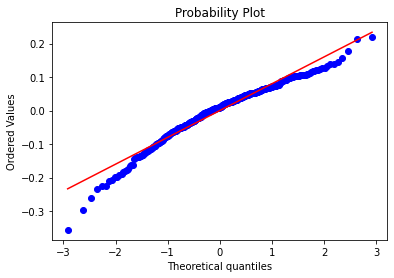

In [148]:
import pylab 

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

## Al hacer un QQ plot, encontramos gráficamente que la diferencia vs la distribución normal se encuentra en las colas de la distribución de los datos por una alta dispersión en los extremos. 

## Autocorrelación de los residuales

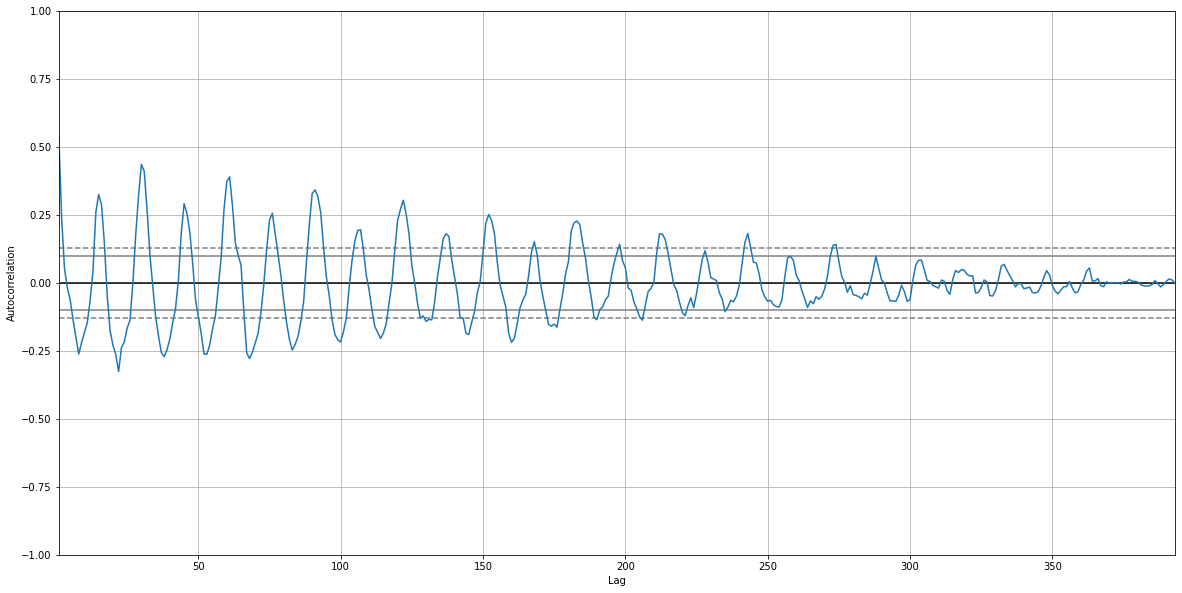

In [149]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(residuals);

## El gráfico de autocorrelación presenta algunos rezagos significativos, mostrando que posiblemente  aún existen efectos por modelar

## Modelado de la serie diferenciada

In [150]:
# Se toma la columna de datos y se hace la diferenciacion, se vuelve a armar df para prophet.
from fbprophet import Prophet
m = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)
df1 = df.iloc[:,:2]
df1.rename(columns={'0001':'y'}, inplace=True)
diff = np.diff(df1['y'])
df2 = df1.iloc[1:].copy()
df2['y'] = diff
df2.head()

,ds,y
1,2018-12-02,-0.049155
2,2018-12-03,-0.067766
3,2018-12-04,-0.117283
4,2018-12-05,-0.084215
5,2018-12-06,0.100661


In [151]:
#Se prepara df con fechas a proyectar
m.fit(df2)
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
417,2020-01-26
418,2020-01-27
419,2020-01-28
420,2020-01-29
421,2020-01-30


In [152]:
# se realiza el forecast
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
417,2020-01-26,-0.035370,-0.130115,0.065523
418,2020-01-27,0.023994,-0.073889,0.118322
419,2020-01-28,-0.010707,-0.105419,0.087610
420,2020-01-29,0.009712,-0.084717,0.115426
421,2020-01-30,0.057780,-0.039369,0.154542


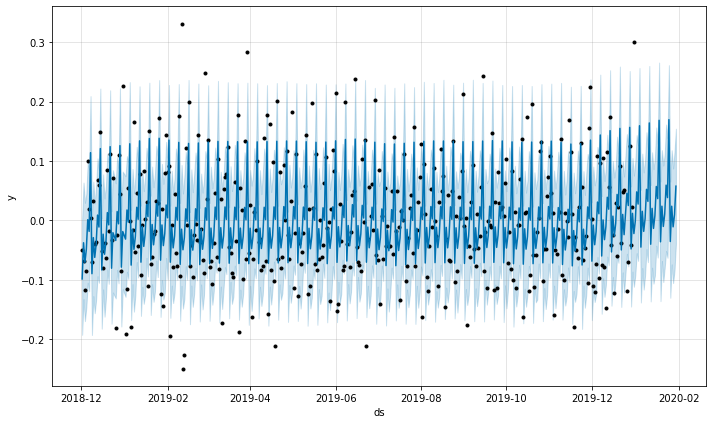

In [153]:
#plot del forecast, se observa tendencia positiva en el mes de enero
fig1 = m.plot(forecast)

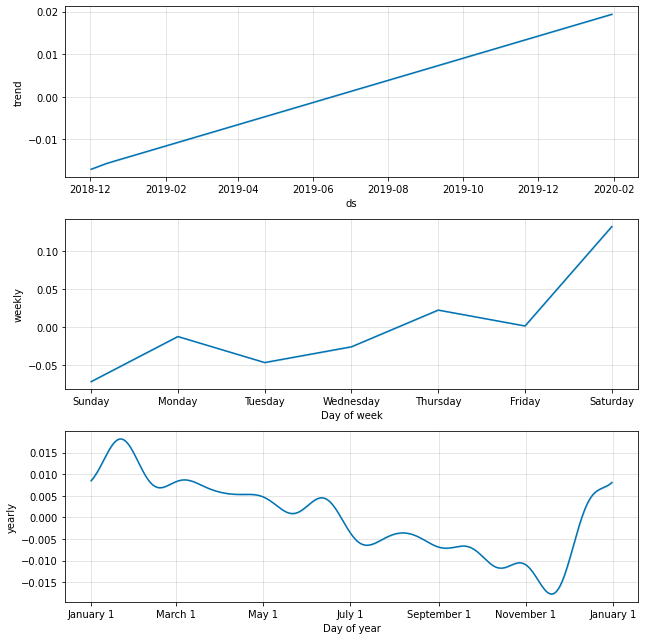

In [154]:
m.plot_components(forecast);

## Con la serie diferenciada, la tendencia es creciente, se nota estacionalidad semanal los días jueves y sábados, mientras que la anual en enero y dicembre.

In [155]:
# se sacan los residuales de la proyección
m = Prophet()
m.fit(df2)
forecast = m.predict()
df = pd.merge(df2, forecast, on='ds')
residuals2 = df['yhat'] - df['y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


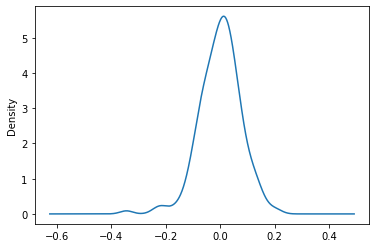

count    392.000000
mean      -0.000011
std        0.076580
min       -0.346522
25%       -0.046598
50%        0.005064
75%        0.047394
max        0.212651
dtype: float64


In [156]:
#grafico de residuales
residuals2.plot(kind='kde')
plt.show()
print(residuals2.describe())

## Al hacer un análisis a los residuales, encontramos que los residuales tienen un sesgo leve negativo con una media de -0.000011 y una desviación estandar de 0.08.

In [157]:
#tests de normalidad
from scipy import stats
stats.kstest(residuals2, 'norm')

KstestResult(statistic=0.42467628500560173, pvalue=1.1756996251131533e-64)

In [158]:
stats.shapiro(residuals2)

(0.9745604395866394, 2.280263288412243e-06)

## Según las pruebas de Kolmogorov-Smirnov y Shapiro-Wilks, los residuales no tienen comportamiento normal al rechazarse la Ho en ambos tests con un nivel de significancia de 0.05. 

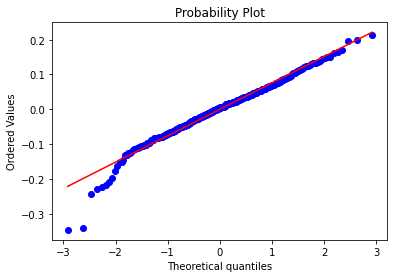

In [159]:
stats.probplot(residuals2, dist="norm", plot=pylab)
pylab.show()

## Al hacer un QQ plot, encontramos gráficamente que la diferencia vs la distribución normal se encuentra en la cola inferior de la distribución de los datos por una alta dispersión en este extremo.

## A difernecia de la serie original, la dispersion se centra en la cola inferior, mientras que en la cola superior hay mejor ajuste.

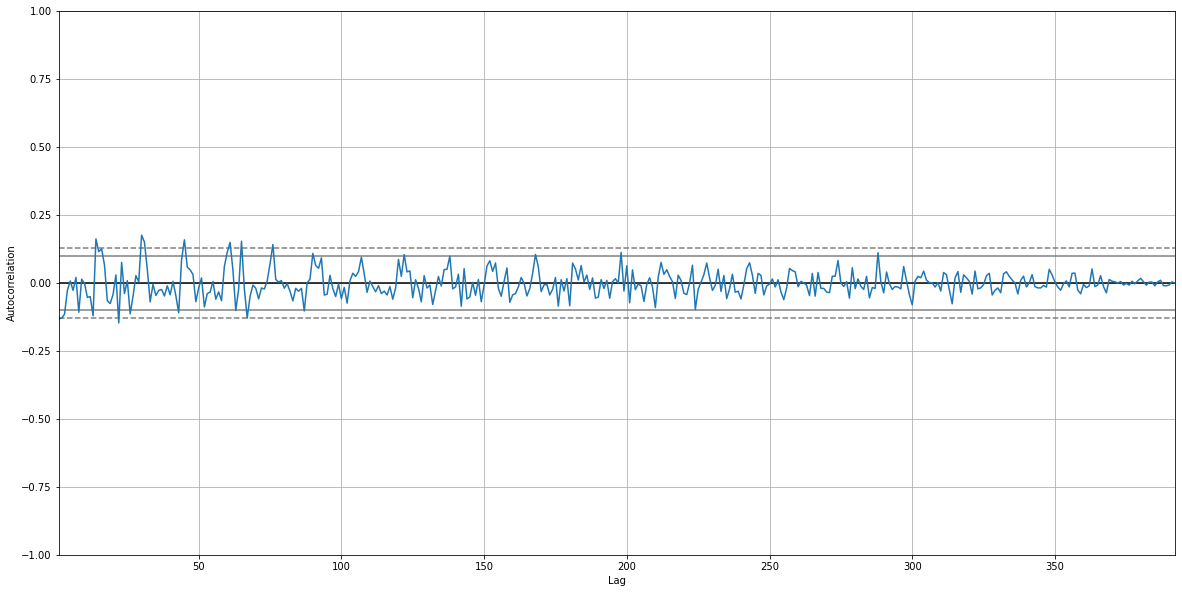

In [160]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(residuals2);

## El gráfico de autocorrelación presenta pocos rezagos significativos, mostrando que la difenciación genera un mejor modelo que evidencia un autocorrelograma con rezagos entre el intervalo de confianza.

### Modelado de la serie mediante ARIMA

In [161]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(df1['y'], order=(13,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  392
Model:                ARIMA(13, 1, 0)   Log Likelihood                 484.607
Method:                       css-mle   S.D. of innovations              0.070
Date:                Mon, 22 Jun 2020   AIC                           -939.215
Time:                        18:39:43   BIC                           -879.646
Sample:                             1   HQIC                          -915.606
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.355e-05      0.001      0.112      0.911      -0.001       0.001
ar.L1.D.y     -0.4484      0.047     -9.629      0.000      -0.540      -0.357
ar.L2.D.y     -0.4535      0.048     -9.443      0.0

In [168]:
#Forecast de 30 dias mediante modelo arima
from datetime import date
forecast = model_fit.forecast(steps=30)[0]
print(forecast)
resultado = pd.DataFrame(forecast)
resultado

[7.36814455 7.26494605 7.18343343 7.19611274 7.22574561 7.25180028
 7.31520428 7.26223615 7.23539546 7.15141786 7.18909907 7.21800292
 7.22917596 7.36936956 7.34581209 7.30538459 7.22128539 7.21829111
 7.23403762 7.2556201  7.31887286 7.28032891 7.26064126 7.19047987
 7.18900632 7.21124684 7.22919899 7.30549053 7.30618034 7.30133686]


,0
0,7.368145
1,7.264946
2,7.183433
3,7.196113
4,7.225746
5,7.251800
6,7.315204
7,7.262236
8,7.235395
9,7.151418


## Al modelar la serie mendiante un modelo ARIMA, se obtiene un modelo ARIMA (13,1,0) con todos sus estimaciones significativas

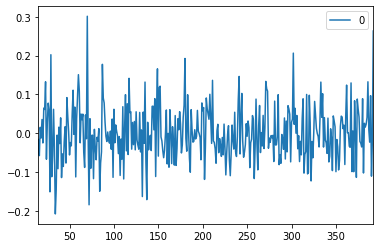

In [163]:
# plot residual errors
residualsARIMA = pd.DataFrame(model_fit.resid.iloc[14:393])
residualsARIMA.plot()
plt.show()

## Los residuales de este ajuste no muestran una tendencia, lo cual indica que se está realizando un ajuste adecuado.

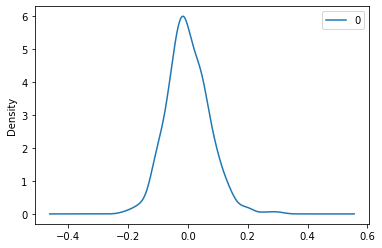

                0
count  378.000000
mean     0.000115
std      0.070437
min     -0.207466
25%     -0.044951
50%     -0.006317
75%      0.041929
max      0.301387


In [164]:
residualsARIMA.plot(kind='kde')
plt.show()
print(residualsARIMA.describe())

## Al hacer un análisis a los residuales, encontramos que los residuales tienen un sesgo leve positivo con una media de 0.018 y una desviación estandar de 0.09.

In [165]:
#analisis de normalidad
from scipy import stats
stats.kstest(residualsARIMA, 'norm')

KstestResult(statistic=0.6184404080912567, pvalue=8.231298475727645e-140)

In [166]:
output = model_fit.forecast()
output

(array([7.36814455]), array([0.06977593]), array([[7.23138624, 7.50490287]]))

## Según la prueba de Kolmogorov-Smirnov los residuales no tienen comportamiento normal al rechazarse la Ho en ambos tests con un nivel de significancia de 0.05. 

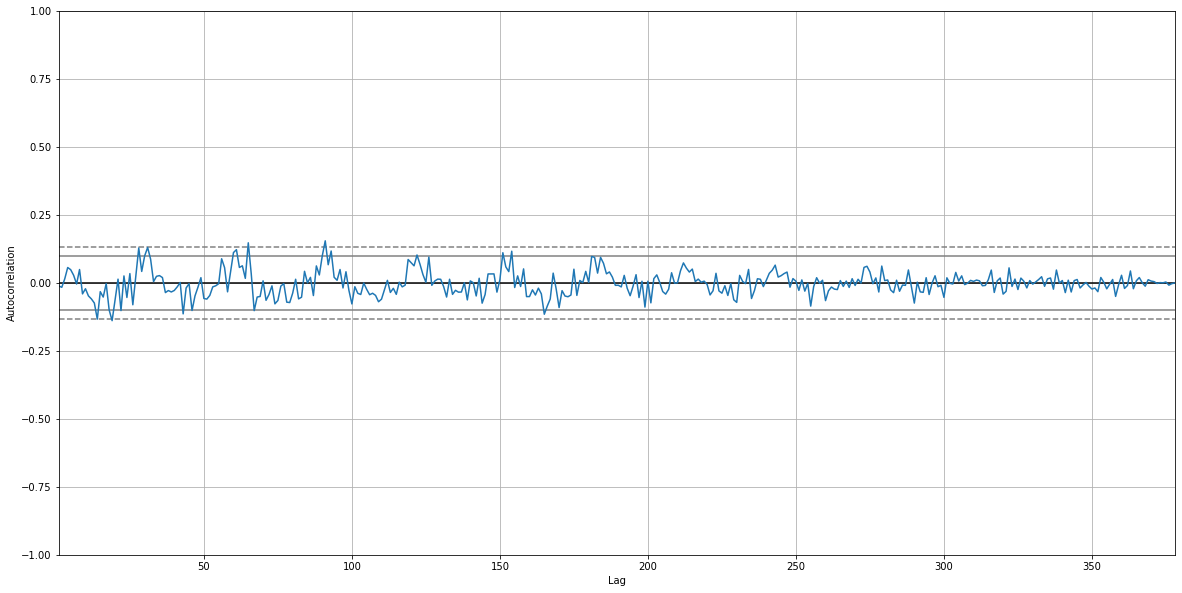

In [167]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(residualsARIMA);

## El gráfico de autocorrelación presenta algunos rezagos significativos, mostrando que posiblemente  aún existen efectos por modelar

## 5. Conclusions: The conclusions must be relevant to the problem of interest. Conclusions on the procedures performed are also expected.

#### Al aplicar el modelo ARIMA y FB Prophet encontramos que Prophet estima y halla automáticamente las estacionalidades de la tienda, mostrando picos de venta semanales en los fines de semana y anuales los meses de más venta como lo son junio, Julio y Diciembre. 
<br>

#### Comparado frente al modelo ARIMA la proyección de FB Prophet es más acertada, con una diferencia del 3,7% y RMSE de 2.401.861 frente el 31% del ARIMA y RMSE de 5.408.878.
<br>

#### La diferencia de 3,7% se podría reducir aún más incluyendo los festivos y estacionalidad de días especiales por fechas de pago las cuales influyen considerablemente en una cadena de retail. 
<br>

#### Tanto en el modelo de la serie diferenciada en FB prophet, como en el ajustado por ARIMA, se observó que se obtuvieron mejores resultados al utilizar la diferencia de orden 1, por enden esta es otra opción para ajustar la serie.
<br>
 
#### Una vez estimado el modelo de una tienda este modelo se podrá replicar a las demás tiendas de la compañía y tener predicciones más acertadas, lo cual repercutirá como lo comentamos inicialmente en  tomar acciones correctivas en caso de ser necesario y lograr la consecución de las metas propuestas desde casa matriz, además de afinar mejor otros aspectos como: el número de empleados por tienda, política de inventarios, logística o toma de decisiones sobre el cierre de tiendas.
